# Create ICs on Demand

In [1]:
import numpy as np
import matplotlib.pylab as plt

from models.multiresolution_flow_3d import *
from models.trainer import *

%matplotlib inline

# Setup the model

In [2]:
nlevel=5

shape = (2**nlevel,2**nlevel,2**nlevel)

model = multi_scale_model(nlevel=nlevel)

tm = trainer(model)

Trainer model: tm
load initial state


# test training with white noise

In [6]:
for i in np.arange(1000):
    x_train = np.random.normal(0,0.01,shape)+3.1415
    tm.train_single(x_train, silent=True)
tm.transfer(silent=False)

Train model...
Training done


0

0.006170461447273722 1.006313544079366


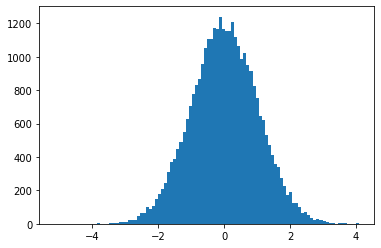

In [7]:
x = model.generate()
print(np.mean(x[nlevel].flatten()),np.std(x[nlevel].flatten()))


plt.hist(x[nlevel].flatten(),bins=100)
plt.show()

# load BORG data

In [8]:
nlevel=8
shape = (2**nlevel,2**nlevel,2**nlevel)
print(shape)
model = multi_scale_model(nlevel=nlevel)

tm_borg = trainer(model)

(256, 256, 256)
Trainer model: tm_borg
load initial state


In [9]:
tm_borg.transfer(silent=False)

Train model...
Training done


0

## generate sample

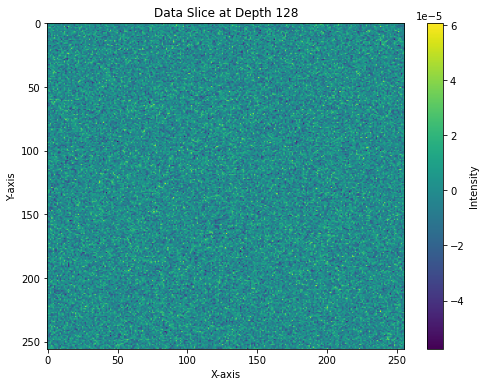

In [10]:
x = tm_borg.gen_model.generate()

# Create the plot
plt.figure(figsize=(8, 6))
plt.imshow(x[nlevel][:,:,128], cmap='viridis', aspect='auto')
plt.colorbar(label='Intensity')
plt.title('Data Slice at Depth 128')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')

# Show the plot
plt.show()

## get an ensemble

In [29]:
from tqdm import tqdm

# Assuming tm_borg.gen_model.generate() is a function that generates your data
# Initialize variables
sampnr = 100

count =0
mean = 0
M2 = 0 

for i in tqdm(range(sampnr)):
    x = tm_borg.gen_model.generate()[nlevel]    
    count += 1
    delta = x - mean
    mean += delta / count
    M2 += delta * (x - mean)  # Simplified calculation of delta2
    
variance = M2 / count
sample_variance = M2 / (count - 1)


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [10:15<00:00,  6.15s/it]


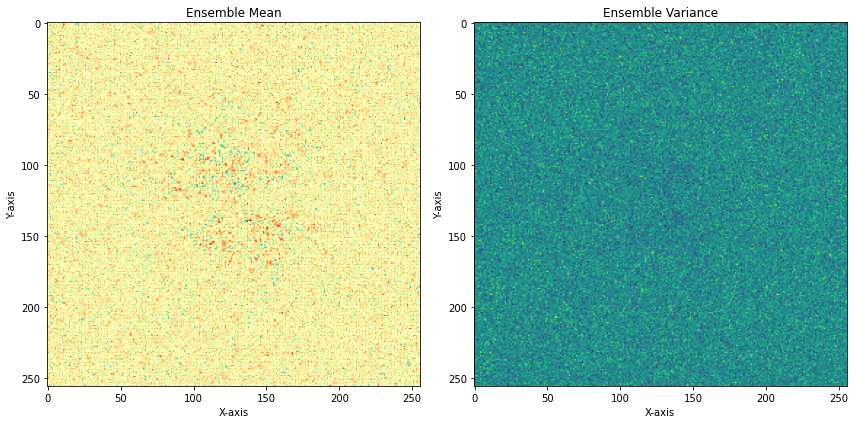

In [30]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot ensemble mean
axes[0].imshow(mean[:,:,128], cmap='Spectral', aspect='auto')
axes[0].set_title('Ensemble Mean')
axes[0].set_xlabel('X-axis')
axes[0].set_ylabel('Y-axis')
axes[0].grid(False)  # Turn off grid

# Plot ensemble variance
im = axes[1].imshow(np.log10(variance[:,:,128]), cmap='viridis', aspect='auto')
axes[1].set_title('Ensemble Variance')
axes[1].set_xlabel('X-axis')
axes[1].set_ylabel('Y-axis')
axes[1].grid(False)  # Turn off grid

plt.tight_layout()
plt.show()